In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5279 - accuracy: 0.4413 - val_loss: 1.2999 - val_accuracy: 0.5395
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1752 - accuracy: 0.5820 - val_loss: 1.0663 - val_accuracy: 0.6182
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0160 - accuracy: 0.6426 - val_loss: 1.0160 - val_accuracy: 0.6458
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9180 - accuracy: 0.6789 - val_loss: 0.9771 - val_accuracy: 0.6591
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8397 - accuracy: 0.7036 - val_loss: 0.9001 - val_accuracy: 0.6877
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7837 - accuracy: 0.7257 - val_loss: 0.8917 - val_accuracy: 0.6939
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7386 - accuracy: 0.7417 - val_loss: 0.8516 -

Epoch 57/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1082 - accuracy: 0.9628 - val_loss: 2.6559 - val_accuracy: 0.6895
Epoch 58/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1073 - accuracy: 0.9633 - val_loss: 2.7393 - val_accuracy: 0.6932
Epoch 59/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1125 - accuracy: 0.9619 - val_loss: 2.7888 - val_accuracy: 0.6884
Epoch 60/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1075 - accuracy: 0.9639 - val_loss: 2.8068 - val_accuracy: 0.6899
Epoch 61/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1048 - accuracy: 0.9642 - val_loss: 2.8076 - val_accuracy: 0.6897
Epoch 62/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1036 - accuracy: 0.9640 - val_loss: 2.8120 - val_accuracy: 0.6823
Epoch 63/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0997 - accuracy: 0.9660 - val_loss: 2

313/313 - 1s - loss: 3.6432 - accuracy: 0.6913


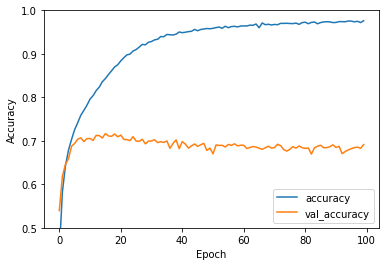

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.6912999749183655


# Final 

In [14]:
import alert
from tensorflow import keras
from tensorflow.keras import datasets
import numpy as np
import json
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam
import logging

# create logger
logger = logging.getLogger('LOGFILE.log')
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)


mail = alert.mail(sender_email="rehan.logs@gmail.com", sender_password="rehanguhalogs")

lrs = [0.001, 0.1] # , 0.01, 0.003, 0.001]
epochs = [50, 100] # , 150, 200] #, 250]
optimizers = [RMSprop, Adam, SGD] #, Adagrad, Adadelta, Adamax, Nadam]


def compile_optimizer(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    logger.info('Model Compiled')

    return model

def train_mnist(model, epoch):
    history = model.fit(x_train, y_train,
                    epochs=epoch,
                    verbose=True,
                    validation_data=(x_test, y_test))
    logger.info('Model Fit Complete')

    return history, model


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


logger.info('Dataset Load and Split Complete')

for epoch in epochs:
    for opt in optimizers:
        for lr in lrs:
            mnist_key = "{opt}_{lr}_{epoch}".format(opt=opt.__name__,lr=lr,epoch=epoch)
            logger.info("---")
            logger.info(mnist_key)
            logger.info("Started...")
            model = compile_optimizer(opt(learning_rate=lr))
            history, model = train_mnist(model, epoch)
            with open("output/CIFAR10_temp/{name}_history.json".format(name=mnist_key), "w") as outputfile:
                json.dump(history.history, outputfile)
            logger.info("Completed.")
            logger.info("---")
    mail.send_email(receiver_email="rehan.guha@imaginea.com", subject="{name}_{epoch} Completed".format(name=opt.__name__,epoch=epoch), msg="Benchmark saved.")
mail.send_email(receiver_email="rehan.guha@imaginea.com", subject="== Completed ==".format(name=opt.__name__,epoch=epoch), msg="Benchmark saved.")
    
    

2020-10-28 07:09:34,548 - LOGFILE.log - INFO - Dataset Load and Split Complete
2020-10-28 07:09:34,548 - LOGFILE.log - INFO - Dataset Load and Split Complete
2020-10-28 07:09:34,548 - LOGFILE.log - INFO - Dataset Load and Split Complete
2020-10-28 07:09:34,551 - LOGFILE.log - INFO - ---
2020-10-28 07:09:34,551 - LOGFILE.log - INFO - ---
2020-10-28 07:09:34,551 - LOGFILE.log - INFO - ---
2020-10-28 07:09:34,553 - LOGFILE.log - INFO - RMSprop_0.001_50
2020-10-28 07:09:34,553 - LOGFILE.log - INFO - RMSprop_0.001_50
2020-10-28 07:09:34,553 - LOGFILE.log - INFO - RMSprop_0.001_50
2020-10-28 07:09:34,555 - LOGFILE.log - INFO - Started...
2020-10-28 07:09:34,555 - LOGFILE.log - INFO - Started...
2020-10-28 07:09:34,555 - LOGFILE.log - INFO - Started...
2020-10-28 07:09:34,607 - LOGFILE.log - INFO - Model Compiled
2020-10-28 07:09:34,607 - LOGFILE.log - INFO - Model Compiled
2020-10-28 07:09:34,607 - LOGFILE.log - INFO - Model Compiled


Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5352 - accuracy: 0.4480 - val_loss: 3.4274 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1305 - accuracy: 0.6020 - val_loss: 3.7209 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9700 - accuracy: 0.6601 - val_loss: 4.0222 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8639 - accuracy: 0.6965 - val_loss: 4.2008 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7934 - accuracy: 0.7252 - val_loss: 4.9509 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7316 - accuracy: 0.7447 - val_loss: 5.0505 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6840 - accuracy: 0.7632 - val_loss: 6.2940 - val_ac

2020-10-28 07:20:32,191 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:20:32,191 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:20:32,191 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:20:32,248 - LOGFILE.log - INFO - Completed.
2020-10-28 07:20:32,248 - LOGFILE.log - INFO - Completed.
2020-10-28 07:20:32,248 - LOGFILE.log - INFO - Completed.
2020-10-28 07:20:32,250 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,250 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,250 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,251 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,251 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,251 - LOGFILE.log - INFO - ---
2020-10-28 07:20:32,253 - LOGFILE.log - INFO - RMSprop_0.001_100
2020-10-28 07:20:32,253 - LOGFILE.log - INFO - RMSprop_0.001_100
2020-10-28 07:20:32,253 - LOGFILE.log - INFO - RMSprop_0.001_100
2020-10-28 07:20:32,255 - LOGFILE.log - INFO - Started...
2020-10-28 07:20:32,255 - LOGFILE.log - INFO - Started...
2020-10-28 

Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5307 - accuracy: 0.4459 - val_loss: 3.5948 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1190 - accuracy: 0.6065 - val_loss: 3.2869 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9520 - accuracy: 0.6692 - val_loss: 3.5653 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8466 - accuracy: 0.7029 - val_loss: 3.7465 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7687 - accuracy: 0.7341 - val_loss: 4.8042 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7094 - accuracy: 0.7545 - val_loss: 5.2972 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6512 - accuracy: 0.7726 - val_loss: 5.6648 -

Epoch 57/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4842 - accuracy: 0.8536 - val_loss: 2.5075 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4798 - accuracy: 0.8550 - val_loss: 2.9061 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4821 - accuracy: 0.8573 - val_loss: 6.1413 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4799 - accuracy: 0.8563 - val_loss: 4.1457 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4748 - accuracy: 0.8581 - val_loss: 6.1373 - val_accuracy: 0.1000
Epoch 62/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4753 - accuracy: 0.8568 - val_loss: 3.7415 - val_accuracy: 0.1000
Epoch 63/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4658 - accuracy: 0.8603 - val_loss: 5

2020-10-28 07:42:42,605 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:42:42,605 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:42:42,605 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:42:42,641 - LOGFILE.log - INFO - Completed.
2020-10-28 07:42:42,641 - LOGFILE.log - INFO - Completed.
2020-10-28 07:42:42,641 - LOGFILE.log - INFO - Completed.
2020-10-28 07:42:42,642 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,642 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,642 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,644 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,644 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,644 - LOGFILE.log - INFO - ---
2020-10-28 07:42:42,646 - LOGFILE.log - INFO - RMSprop_0.1_50
2020-10-28 07:42:42,646 - LOGFILE.log - INFO - RMSprop_0.1_50
2020-10-28 07:42:42,646 - LOGFILE.log - INFO - RMSprop_0.1_50
2020-10-28 07:42:42,647 - LOGFILE.log - INFO - Started...
2020-10-28 07:42:42,647 - LOGFILE.log - INFO - Started...
2020-10-28 07:42:42,

Epoch 1/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1578.9633 - accuracy: 0.1016 - val_loss: 2.3206 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3160 - accuracy: 0.1015 - val_loss: 2.3261 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3165 - accuracy: 0.0996 - val_loss: 2.3183 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3162 - accuracy: 0.1010 - val_loss: 2.3181 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3151 - accuracy: 0.1015 - val_loss: 2.3179 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3168 - accuracy: 0.0973 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3160 - accuracy: 0.1028 - val_loss: 2.3055 - val

2020-10-28 07:53:43,027 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:53:43,027 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:53:43,027 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 07:53:43,030 - LOGFILE.log - INFO - Completed.
2020-10-28 07:53:43,030 - LOGFILE.log - INFO - Completed.
2020-10-28 07:53:43,030 - LOGFILE.log - INFO - Completed.
2020-10-28 07:53:43,031 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,031 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,031 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,032 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,032 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,032 - LOGFILE.log - INFO - ---
2020-10-28 07:53:43,034 - LOGFILE.log - INFO - RMSprop_0.1_100
2020-10-28 07:53:43,034 - LOGFILE.log - INFO - RMSprop_0.1_100
2020-10-28 07:53:43,034 - LOGFILE.log - INFO - RMSprop_0.1_100
2020-10-28 07:53:43,035 - LOGFILE.log - INFO - Started...
2020-10-28 07:53:43,035 - LOGFILE.log - INFO - Started...
2020-10-28 07:53:

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 187.7838 - accuracy: 0.1018 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3162 - accuracy: 0.0995 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3162 - accuracy: 0.0995 - val_loss: 2.3287 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3150 - accuracy: 0.1012 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3162 - accuracy: 0.1001 - val_loss: 2.3301 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3164 - accuracy: 0.0981 - val_loss: 2.3264 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3159 - accuracy: 0.1005 - val_loss: 2.3218

Epoch 57/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3167 - accuracy: 0.0976 - val_loss: 2.3147 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3171 - accuracy: 0.0989 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3161 - accuracy: 0.1006 - val_loss: 2.3414 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3156 - accuracy: 0.1006 - val_loss: 2.3303 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3167 - accuracy: 0.0978 - val_loss: 2.3464 - val_accuracy: 0.1000
Epoch 62/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3161 - accuracy: 0.0999 - val_loss: 2.3185 - val_accuracy: 0.1000
Epoch 63/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3159 - accuracy: 0.1013 - val_loss: 2

2020-10-28 08:15:13,355 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:15:13,355 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:15:13,355 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:15:13,360 - LOGFILE.log - INFO - Completed.
2020-10-28 08:15:13,360 - LOGFILE.log - INFO - Completed.
2020-10-28 08:15:13,360 - LOGFILE.log - INFO - Completed.
2020-10-28 08:15:13,362 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,362 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,362 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,365 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,365 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,365 - LOGFILE.log - INFO - ---
2020-10-28 08:15:13,369 - LOGFILE.log - INFO - Adam_0.001_50
2020-10-28 08:15:13,369 - LOGFILE.log - INFO - Adam_0.001_50
2020-10-28 08:15:13,369 - LOGFILE.log - INFO - Adam_0.001_50
2020-10-28 08:15:13,371 - LOGFILE.log - INFO - Started...
2020-10-28 08:15:13,371 - LOGFILE.log - INFO - Started...
2020-10-28 08:15:13,371

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5099 - accuracy: 0.4496 - val_loss: 3.3687 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1622 - accuracy: 0.5916 - val_loss: 3.1006 - val_accuracy: 0.1004
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0186 - accuracy: 0.6448 - val_loss: 2.9412 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9238 - accuracy: 0.6797 - val_loss: 3.2374 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8491 - accuracy: 0.7024 - val_loss: 3.0469 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7932 - accuracy: 0.7231 - val_loss: 3.2374 - val_accuracy: 0.1034
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7421 - accuracy: 0.7407 - val_loss: 3.4940 - val_ac

2020-10-28 08:25:45,051 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:25:45,051 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:25:45,051 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:25:45,053 - LOGFILE.log - INFO - Completed.
2020-10-28 08:25:45,053 - LOGFILE.log - INFO - Completed.
2020-10-28 08:25:45,053 - LOGFILE.log - INFO - Completed.
2020-10-28 08:25:45,054 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,054 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,054 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,056 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,056 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,056 - LOGFILE.log - INFO - ---
2020-10-28 08:25:45,057 - LOGFILE.log - INFO - Adam_0.001_100
2020-10-28 08:25:45,057 - LOGFILE.log - INFO - Adam_0.001_100
2020-10-28 08:25:45,057 - LOGFILE.log - INFO - Adam_0.001_100
2020-10-28 08:25:45,058 - LOGFILE.log - INFO - Started...
2020-10-28 08:25:45,058 - LOGFILE.log - INFO - Started...
2020-10-28 08:25:45,

Epoch 1/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4840 - accuracy: 0.4610 - val_loss: 3.4024 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1069 - accuracy: 0.6095 - val_loss: 3.6608 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9519 - accuracy: 0.6654 - val_loss: 3.1711 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8622 - accuracy: 0.6980 - val_loss: 3.4201 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7863 - accuracy: 0.7259 - val_loss: 4.3680 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7290 - accuracy: 0.7443 - val_loss: 4.3650 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6804 - accuracy: 0.7618 - val_loss: 5.0486 -

2020-10-28 08:46:58,112 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:46:58,112 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:46:58,112 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:46:58,115 - LOGFILE.log - INFO - Completed.
2020-10-28 08:46:58,115 - LOGFILE.log - INFO - Completed.
2020-10-28 08:46:58,115 - LOGFILE.log - INFO - Completed.
2020-10-28 08:46:58,116 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,116 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,116 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,117 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,117 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,117 - LOGFILE.log - INFO - ---
2020-10-28 08:46:58,119 - LOGFILE.log - INFO - Adam_0.1_50
2020-10-28 08:46:58,119 - LOGFILE.log - INFO - Adam_0.1_50
2020-10-28 08:46:58,119 - LOGFILE.log - INFO - Adam_0.1_50
2020-10-28 08:46:58,120 - LOGFILE.log - INFO - Started...
2020-10-28 08:46:58,120 - LOGFILE.log - INFO - Started...
2020-10-28 08:46:58,120 - LOG

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 12.6548 - accuracy: 0.1014 - val_loss: 2.3307 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3154 - accuracy: 0.1027 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3161 - accuracy: 0.0983 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3148 - accuracy: 0.1002 - val_loss: 2.3140 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3163 - accuracy: 0.0989 - val_loss: 2.3198 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3162 - accuracy: 0.0989 - val_loss: 2.3143 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3153 - accuracy: 0.1015 - val_loss: 2.3150 - val_a

2020-10-28 08:57:31,242 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:57:31,242 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:57:31,242 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 08:57:31,245 - LOGFILE.log - INFO - Completed.
2020-10-28 08:57:31,245 - LOGFILE.log - INFO - Completed.
2020-10-28 08:57:31,245 - LOGFILE.log - INFO - Completed.
2020-10-28 08:57:31,247 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,247 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,247 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,251 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,251 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,251 - LOGFILE.log - INFO - ---
2020-10-28 08:57:31,254 - LOGFILE.log - INFO - Adam_0.1_100
2020-10-28 08:57:31,254 - LOGFILE.log - INFO - Adam_0.1_100
2020-10-28 08:57:31,254 - LOGFILE.log - INFO - Adam_0.1_100
2020-10-28 08:57:31,256 - LOGFILE.log - INFO - Started...
2020-10-28 08:57:31,256 - LOGFILE.log - INFO - Started...
2020-10-28 08:57:31,256 - 

Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 9.5999 - accuracy: 0.0996 - val_loss: 2.3186 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3146 - accuracy: 0.1024 - val_loss: 2.3127 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3157 - accuracy: 0.0999 - val_loss: 2.3145 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3160 - accuracy: 0.1012 - val_loss: 2.3128 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3157 - accuracy: 0.0989 - val_loss: 2.3218 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3151 - accuracy: 0.0999 - val_loss: 2.3177 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3160 - accuracy: 0.1003 - val_loss: 2.3160 -

Epoch 57/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3150 - accuracy: 0.0999 - val_loss: 2.3101 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3155 - accuracy: 0.0998 - val_loss: 2.3194 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3156 - accuracy: 0.1010 - val_loss: 2.3129 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3155 - accuracy: 0.0995 - val_loss: 2.3183 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3150 - accuracy: 0.0978 - val_loss: 2.3209 - val_accuracy: 0.1000
Epoch 62/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3155 - accuracy: 0.0984 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 63/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3148 - accuracy: 0.1008 - val_loss: 2

2020-10-28 09:18:56,060 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:18:56,060 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:18:56,060 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:18:56,064 - LOGFILE.log - INFO - Completed.
2020-10-28 09:18:56,064 - LOGFILE.log - INFO - Completed.
2020-10-28 09:18:56,064 - LOGFILE.log - INFO - Completed.
2020-10-28 09:18:56,065 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,065 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,065 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,066 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,066 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,066 - LOGFILE.log - INFO - ---
2020-10-28 09:18:56,068 - LOGFILE.log - INFO - SGD_0.001_50
2020-10-28 09:18:56,068 - LOGFILE.log - INFO - SGD_0.001_50
2020-10-28 09:18:56,068 - LOGFILE.log - INFO - SGD_0.001_50
2020-10-28 09:18:56,069 - LOGFILE.log - INFO - Started...
2020-10-28 09:18:56,069 - LOGFILE.log - INFO - Started...
2020-10-28 09:18:56,069 - 

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2828 - accuracy: 0.1234 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2071 - accuracy: 0.1837 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0579 - accuracy: 0.2559 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9837 - accuracy: 0.2792 - val_loss: 2.3203 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9361 - accuracy: 0.2979 - val_loss: 2.3197 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8811 - accuracy: 0.3195 - val_loss: 2.3208 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8204 - accuracy: 0.3419 - val_loss: 2.3239 - val_ac

2020-10-28 09:29:40,959 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:29:40,959 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:29:40,959 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:29:40,962 - LOGFILE.log - INFO - Completed.
2020-10-28 09:29:40,962 - LOGFILE.log - INFO - Completed.
2020-10-28 09:29:40,962 - LOGFILE.log - INFO - Completed.
2020-10-28 09:29:40,963 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,963 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,963 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,964 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,964 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,964 - LOGFILE.log - INFO - ---
2020-10-28 09:29:40,966 - LOGFILE.log - INFO - SGD_0.001_100
2020-10-28 09:29:40,966 - LOGFILE.log - INFO - SGD_0.001_100
2020-10-28 09:29:40,966 - LOGFILE.log - INFO - SGD_0.001_100
2020-10-28 09:29:40,967 - LOGFILE.log - INFO - Started...
2020-10-28 09:29:40,967 - LOGFILE.log - INFO - Started...
2020-10-28 09:29:40,967

Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2949 - accuracy: 0.1258 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2612 - accuracy: 0.1696 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1519 - accuracy: 0.2116 - val_loss: 2.3257 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 2.0361 - accuracy: 0.2539 - val_loss: 2.3378 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9772 - accuracy: 0.2780 - val_loss: 2.3423 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9239 - accuracy: 0.3038 - val_loss: 2.3366 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8633 - accuracy: 0.3283 - val_loss: 2.3465 -

Epoch 57/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0864 - accuracy: 0.6205 - val_loss: 2.7518 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0792 - accuracy: 0.6227 - val_loss: 2.7579 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0718 - accuracy: 0.6267 - val_loss: 2.7630 - val_accuracy: 0.1000
Epoch 60/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0657 - accuracy: 0.6279 - val_loss: 2.7881 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0584 - accuracy: 0.6307 - val_loss: 2.8008 - val_accuracy: 0.1000
Epoch 62/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0521 - accuracy: 0.6334 - val_loss: 2.7934 - val_accuracy: 0.1000
Epoch 63/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0444 - accuracy: 0.6363 - val_loss: 2

2020-10-28 09:50:54,204 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:50:54,204 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:50:54,204 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 09:50:54,243 - LOGFILE.log - INFO - Completed.
2020-10-28 09:50:54,243 - LOGFILE.log - INFO - Completed.
2020-10-28 09:50:54,243 - LOGFILE.log - INFO - Completed.
2020-10-28 09:50:54,245 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,245 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,245 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,247 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,247 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,247 - LOGFILE.log - INFO - ---
2020-10-28 09:50:54,249 - LOGFILE.log - INFO - SGD_0.1_50
2020-10-28 09:50:54,249 - LOGFILE.log - INFO - SGD_0.1_50
2020-10-28 09:50:54,249 - LOGFILE.log - INFO - SGD_0.1_50
2020-10-28 09:50:54,250 - LOGFILE.log - INFO - Started...
2020-10-28 09:50:54,250 - LOGFILE.log - INFO - Started...
2020-10-28 09:50:54,250 - LOGFIL

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8099 - accuracy: 0.3413 - val_loss: 2.9503 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3576 - accuracy: 0.5118 - val_loss: 3.2159 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1641 - accuracy: 0.5878 - val_loss: 3.4364 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0264 - accuracy: 0.6381 - val_loss: 3.6107 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9299 - accuracy: 0.6721 - val_loss: 3.4125 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8537 - accuracy: 0.6998 - val_loss: 3.2811 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7892 - accuracy: 0.7228 - val_loss: 3.1670 - val_ac

2020-10-28 10:01:30,573 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:01:30,573 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:01:30,573 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:01:30,576 - LOGFILE.log - INFO - Completed.
2020-10-28 10:01:30,576 - LOGFILE.log - INFO - Completed.
2020-10-28 10:01:30,576 - LOGFILE.log - INFO - Completed.
2020-10-28 10:01:30,578 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,578 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,578 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,579 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,579 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,579 - LOGFILE.log - INFO - ---
2020-10-28 10:01:30,581 - LOGFILE.log - INFO - SGD_0.1_100
2020-10-28 10:01:30,581 - LOGFILE.log - INFO - SGD_0.1_100
2020-10-28 10:01:30,581 - LOGFILE.log - INFO - SGD_0.1_100
2020-10-28 10:01:30,582 - LOGFILE.log - INFO - Started...
2020-10-28 10:01:30,582 - LOGFILE.log - INFO - Started...
2020-10-28 10:01:30,582 - LOG

Epoch 1/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7899 - accuracy: 0.3498 - val_loss: 3.2310 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3484 - accuracy: 0.5162 - val_loss: 3.4134 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1665 - accuracy: 0.5859 - val_loss: 3.6877 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0382 - accuracy: 0.6346 - val_loss: 4.0136 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9434 - accuracy: 0.6675 - val_loss: 3.3556 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8678 - accuracy: 0.6934 - val_loss: 3.1393 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8030 - accuracy: 0.7180 - val_loss: 3.0997 -

Epoch 57/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5140 - accuracy: 0.8505 - val_loss: 7.0234 - val_accuracy: 0.1000
Epoch 58/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4925 - accuracy: 0.8524 - val_loss: 3.9017 - val_accuracy: 0.1000
Epoch 59/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5080 - accuracy: 0.8513 - val_loss: 2.5502 - val_accuracy: 0.1001
Epoch 60/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5144 - accuracy: 0.8496 - val_loss: 3.1766 - val_accuracy: 0.1000
Epoch 61/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4964 - accuracy: 0.8540 - val_loss: 6.7714 - val_accuracy: 0.1000
Epoch 62/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5011 - accuracy: 0.8535 - val_loss: 14.7425 - val_accuracy: 0.1000
Epoch 63/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4955 - accuracy: 0.8538 - val_loss: 

2020-10-28 10:22:26,635 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:22:26,635 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:22:26,635 - LOGFILE.log - INFO - Model Fit Complete
2020-10-28 10:22:26,638 - LOGFILE.log - INFO - Completed.
2020-10-28 10:22:26,638 - LOGFILE.log - INFO - Completed.
2020-10-28 10:22:26,638 - LOGFILE.log - INFO - Completed.
2020-10-28 10:22:26,639 - LOGFILE.log - INFO - ---
2020-10-28 10:22:26,639 - LOGFILE.log - INFO - ---
2020-10-28 10:22:26,639 - LOGFILE.log - INFO - ---


# Visualization

In [18]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import json
import pandas as pd

def buildOptimizationDictLC(optimizers, learning_rates, epoch):
    opt_dict = {}
    for optimizer in optimizers:
        for lr in learning_rates:
            key = "{opt}_{lr}_{epoch}".format(opt=optimizer,lr=lr,epoch=epoch)
            opt_dict[key] = pd.read_json("output/CIFAR10_temp/{opt}_{lr}_{epoch}_history.json".format(opt=optimizer,lr=lr,epoch=epoch))
    return opt_dict

def plotLearningRateC(optimizers, learning_rates, epoch):
    opt_dict = buildOptimizationDictLC(optimizers, learning_rates, epoch)
    plt.figure(figsize=(20,4))
    for i in range(4):
        plt.subplot(1,4,i+1)
        key = ['accuracy','loss', 'val_accuracy', 'val_loss', ][i]
        title = ['Training Accuracy on CIFAR-10','Training Loss on CIFAR-10', 'Validation Accuracy on CIFAR-10', 'Validation Loss on CIFAR-10'][i]
        for opt in list(opt_dict.keys()):
            epoch_len = -1 * (int(len(str(epoch))) + 1)
            plt.plot(range(epoch), opt_dict[opt][key], label=opt[:epoch_len])
        plt.legend()
        plt.title(title)
    plt.suptitle(str(optimizers[0]) + " (Epoch= " + str(epoch) + ")")
    plt.plot()

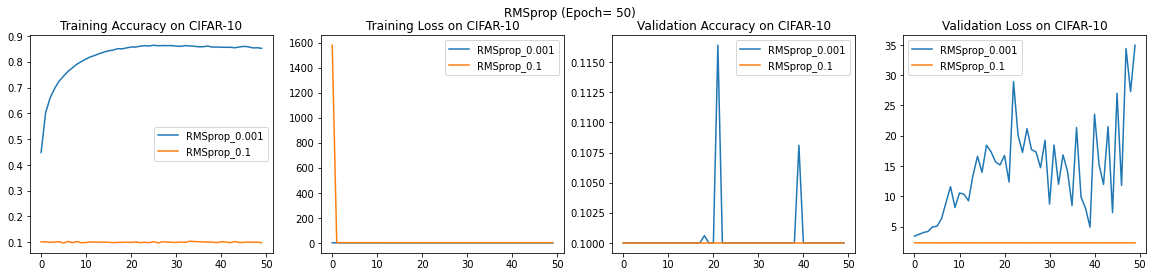

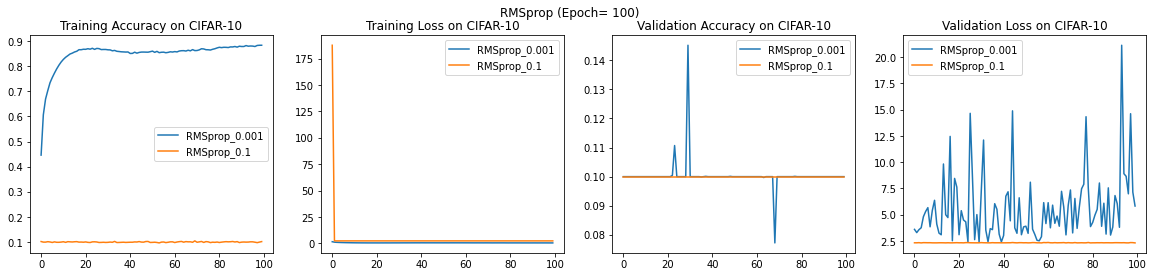

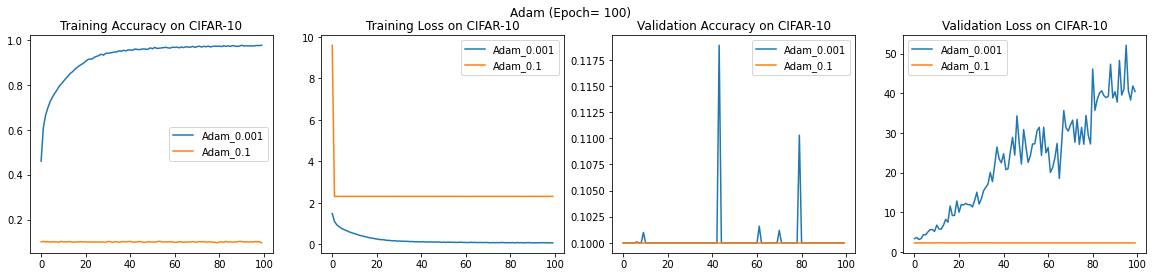

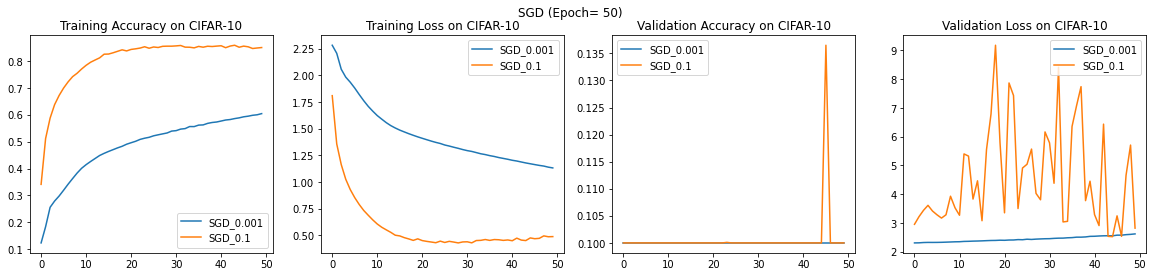

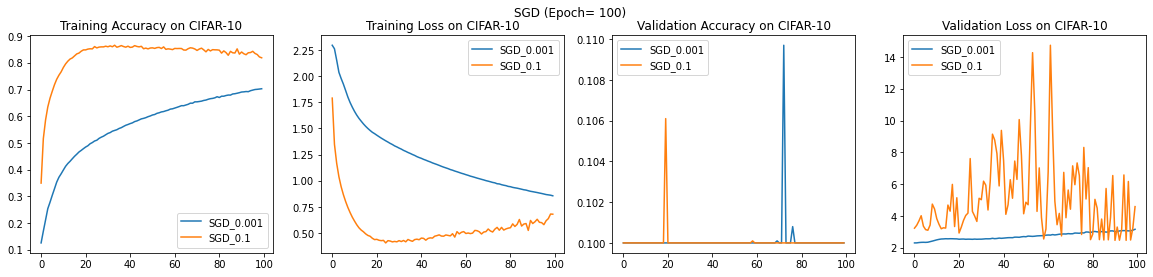

In [19]:
optimizers = ['RMSprop', 'Adam', 'SGD'] # , 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
lrs = [0.001, 0.1] # , 0.01, 0.003, 0.001]
epochs = [50, 100] # , 150, 200] #, 250]

for optimizer in optimizers:
    for epoch in epochs:
        plotLearningRateC([optimizer], lrs, epoch)
